<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/datacollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip3 install xgboost
!pip3 install pandas_ta==0.3.14b0
!pip3 install optuna
!pip3 install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip3 install --upgrade numpy
!pip3 install --upgrade pandas_ta
!pip3 install statsmodels
!pip3 install arch
!pip3 install pytorch-forecasting
!pip3 install prophet
!pip3 install optuna
!pip3 install xgboost
!pip3 install torch
!pip3 install yfinance


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [2]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta


/Users/chielg/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


add more data visualizations and insights

after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [3]:
import matplotlib.pyplot as plt

In [4]:

# api_key = '832OZZOS1E3Z1RJR'
# symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# ts = TimeSeries(key=api_key, output_format='pandas')
# all_data = {}
# for symbol in symbols:
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     # Filter data from 2018 onwards
#     data.index = pd.to_datetime(data.index)
#     data = data[data.index >= '2012-01-01']
#     all_data[symbol] = data
#     print(f"Data for {symbol}:")
#     print(data.head())  # Print the first few rows of the dataset
#     # Plot the data
#     data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
#     plt.xlabel('Date')
#     plt.ylabel('Closing Price')
#     plt.grid(True)
#     plt.show()

/Users/chielg/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Data for LIT:
Price           Close       High        Low       Open Volume
Ticker            LIT        LIT        LIT        LIT    LIT
Date                                                         
2012-06-01  21.947441  22.467204  21.913907  22.467204  32450
2012-06-04  22.098343  22.316309  21.729478  21.980976  27750
2012-06-05  22.366608  22.400140  21.964210  21.964210  11050
2012-06-06  23.070803  23.070803  22.802538  22.836070  11150
2012-06-07  23.204941  23.506740  23.137875  23.489973  23100


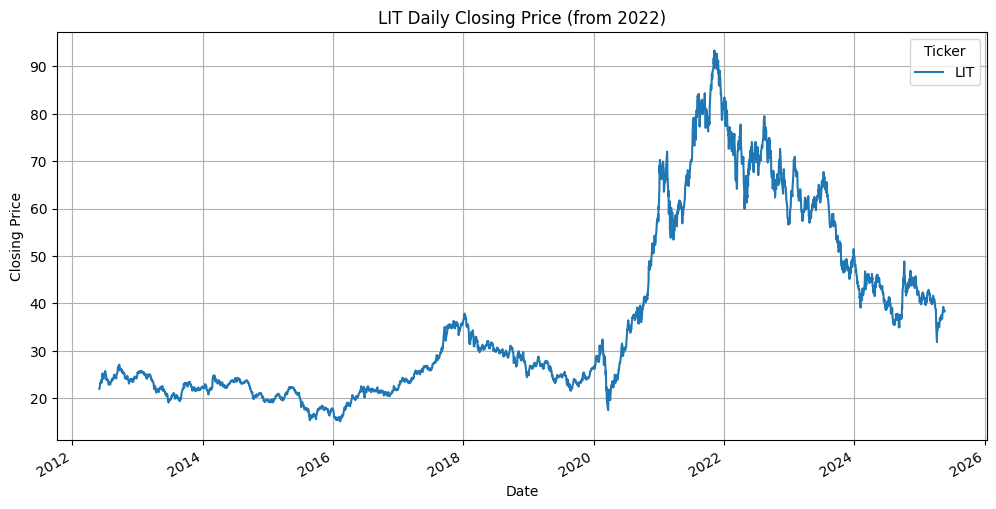

[*********************100%***********************]  1 of 1 completed

Data for REMX:
Price            Close        High         Low        Open Volume
Ticker            REMX        REMX        REMX        REMX   REMX
Date                                                             
2012-06-01  109.274994  110.850277  109.274994  110.021183   6533
2012-06-04  109.274994  109.689536  107.948440  109.440807   8442
2012-06-05  112.259720  112.425543  109.606612  110.021165  13325
2012-06-06  114.829918  115.576106  113.420458  113.420458   8958
2012-06-07  114.166679  117.648883  114.083762  116.902694   8492


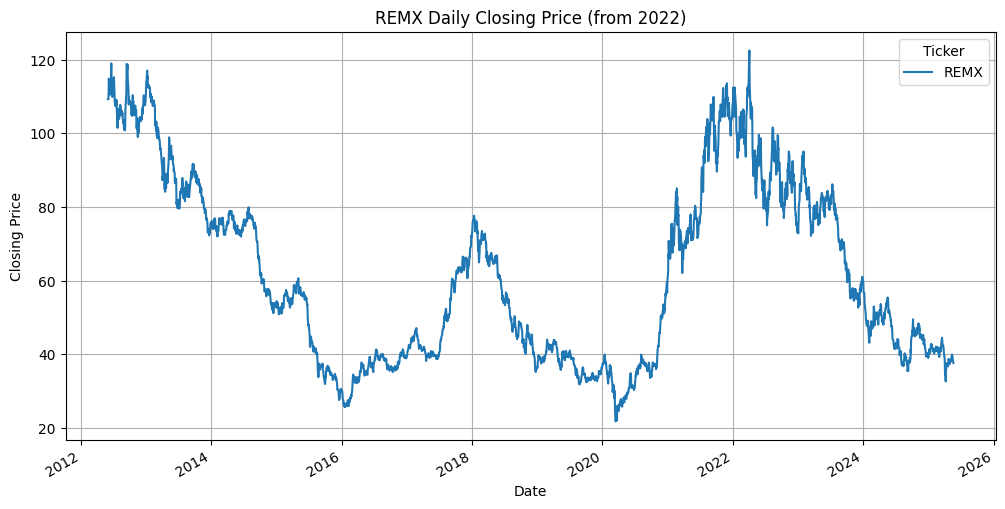

[*********************100%***********************]  1 of 1 completed

Data for URA:
Price           Close       High        Low       Open Volume
Ticker            URA        URA        URA        URA    URA
Date                                                         
2012-06-01  28.713022  29.003051  28.505855  29.003051  29417
2012-06-04  28.008665  28.754457  27.677202  28.422993  34350
2012-06-05  28.878757  28.878757  28.050098  28.050098  15317
2012-06-06  29.831718  30.038883  29.127358  29.334522  26117
2012-06-07  29.624556  30.536080  29.624556  30.121749  18100


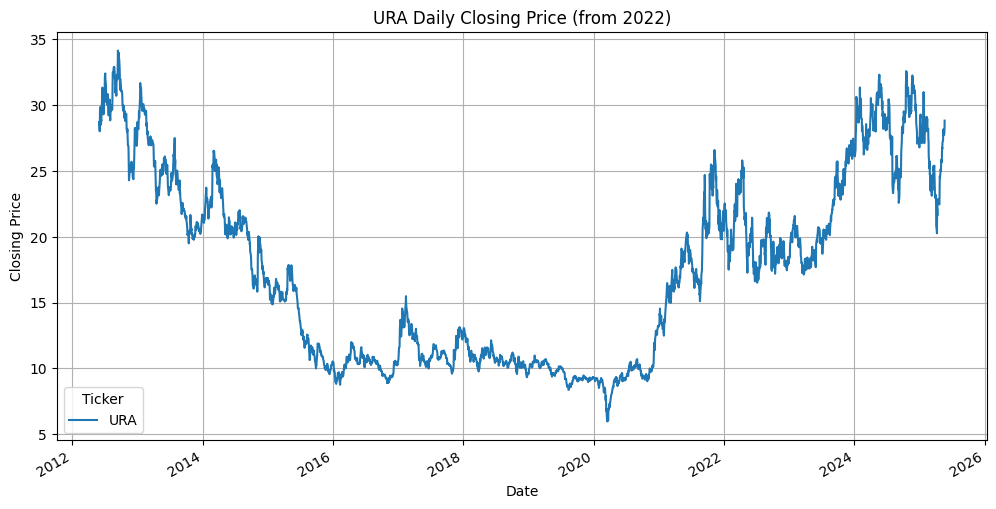

[*********************100%***********************]  1 of 1 completed

Data for GDX:
Price           Close       High        Low       Open    Volume
Ticker            GDX        GDX        GDX        GDX       GDX
Date                                                            
2012-06-01  41.095730  41.351583  39.507657  39.551773  35430300
2012-06-04  41.757420  41.775062  40.460495  41.395689  20460800
2012-06-05  41.933868  41.995626  41.333931  41.554496  14154900
2012-06-06  42.013271  42.983761  41.386867  42.683792  24414600
2012-06-07  40.575188  42.127966  40.081120  42.083853  28584100


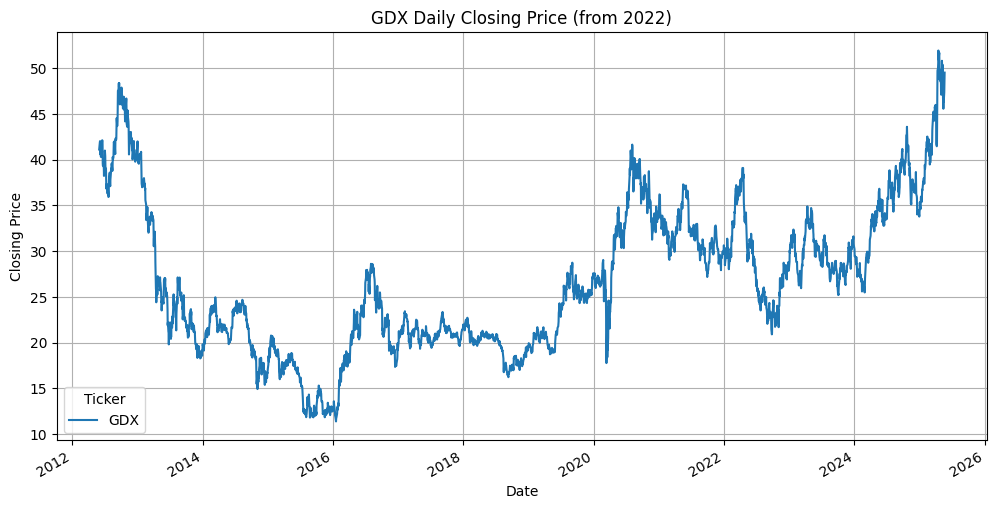

[*********************100%***********************]  1 of 1 completed

Data for GDXJ:
Price           Close       High        Low       Open   Volume
Ticker           GDXJ       GDXJ       GDXJ       GDXJ     GDXJ
Date                                                           
2012-06-01  68.617355  68.883056  65.462150  65.495364  2447050
2012-06-04  68.982704  69.181978  67.288858  69.115552  1155525
2012-06-05  70.875832  71.075106  69.148771  69.148771  1312275
2012-06-06  71.805779  73.665686  70.410846  72.702516  1601125
2012-06-07  69.248398  72.569664  68.252014  72.436810  1444075


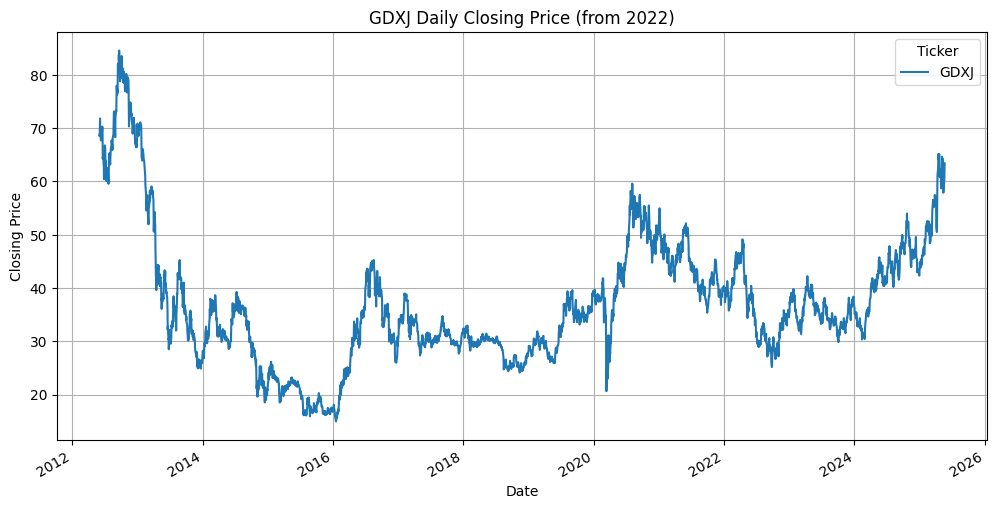

[*********************100%***********************]  1 of 1 completed


Data for XLE:
Price           Close       High        Low       Open    Volume
Ticker            XLE        XLE        XLE        XLE       XLE
Date                                                            
2012-06-01  38.985676  39.419268  38.935403  39.180477  19510300
2012-06-04  38.954258  39.255888  38.401269  39.136491  19034900
2012-06-05  39.287315  39.544958  38.847438  38.866289  15802300
2012-06-06  40.500118  40.537825  39.702057  39.702057  20784000
2012-06-07  40.525246  41.398715  40.443556  41.027964  14686000


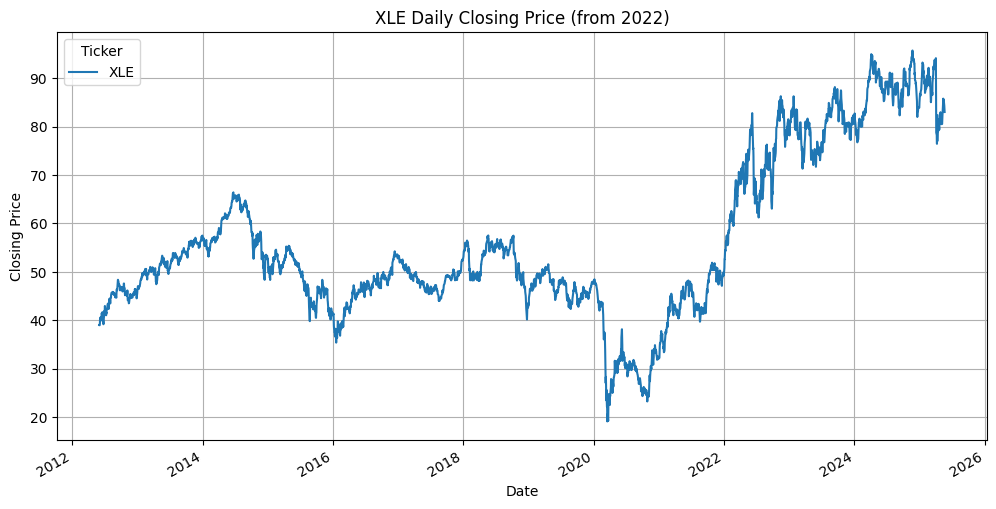

[*********************100%***********************]  1 of 1 completed

Data for ICLN:
Price          Close      High       Low      Open Volume
Ticker          ICLN      ICLN      ICLN      ICLN   ICLN
Date                                                     
2012-06-01  5.233100  5.309384  5.233100  5.255985  28200
2012-06-04  5.217843  5.286499  5.194958  5.286499  10800
2012-06-05  5.278871  5.309385  5.248357  5.263614   5600
2012-06-06  5.385668  5.393297  5.347526  5.347526  12400
2012-06-07  5.393297  5.522980  5.385668  5.522980  20900


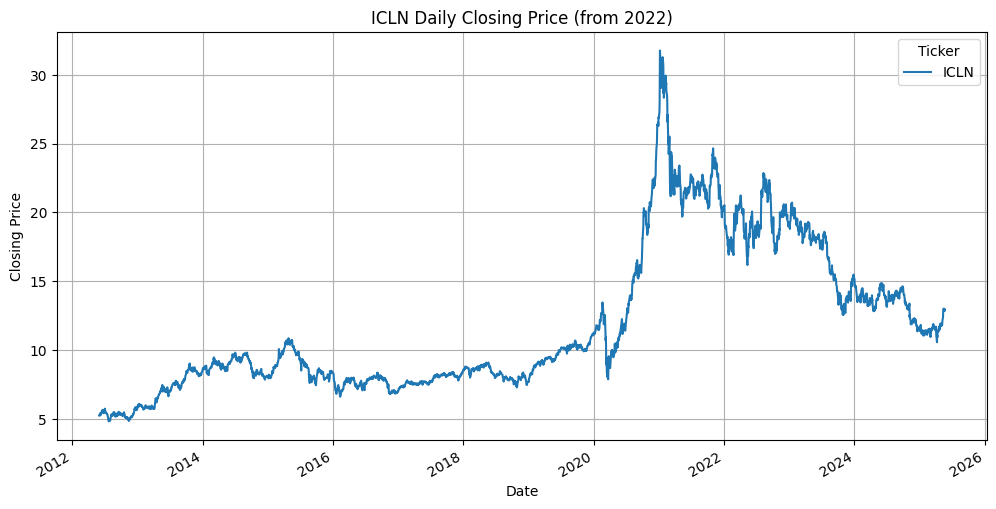

[*********************100%***********************]  1 of 1 completed

Data for SPY:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2012-06-01  101.413147  104.056090  101.413147  102.402273  253240900
2012-06-04  101.365669  101.872101  100.606015  101.595141  202545800
2012-06-05  102.133255  102.283592  101.112470  101.167861  164149400
2012-06-06  104.428001  104.475478  102.813740  102.845399  184202800
2012-06-07  104.491341  105.662463  104.277686  105.614987  184772700


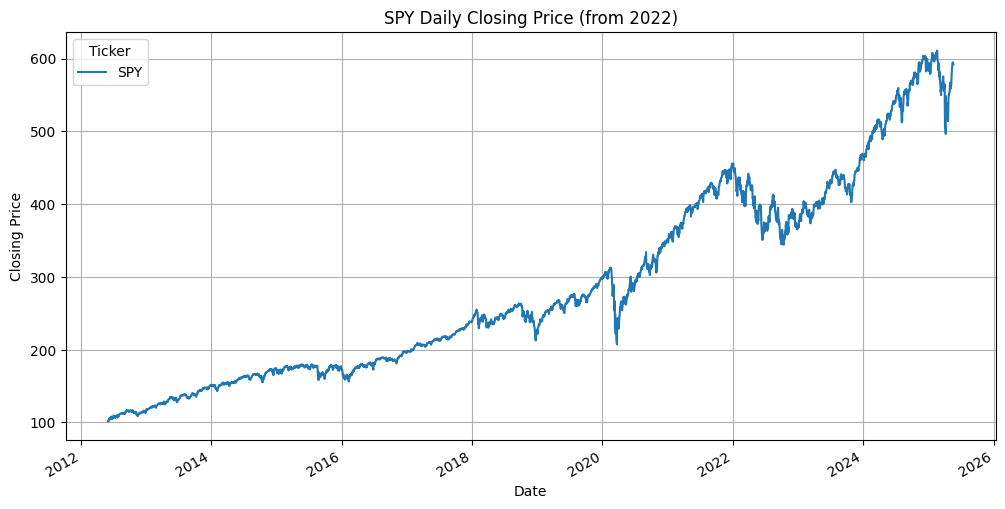

[*********************100%***********************]  1 of 1 completed

Data for GLD:
Price            Close        High         Low        Open    Volume
Ticker             GLD         GLD         GLD         GLD       GLD
Date                                                                
2012-06-01  157.500000  158.309998  154.869995  155.410004  27399400
2012-06-04  157.320007  157.440002  156.160004  157.259995  11462100
2012-06-05  157.139999  157.270004  156.419998  156.919998   8095300
2012-06-06  157.210007  159.199997  156.589996  158.899994  15771600
2012-06-07  154.500000  157.839996  153.190002  157.820007  18921600


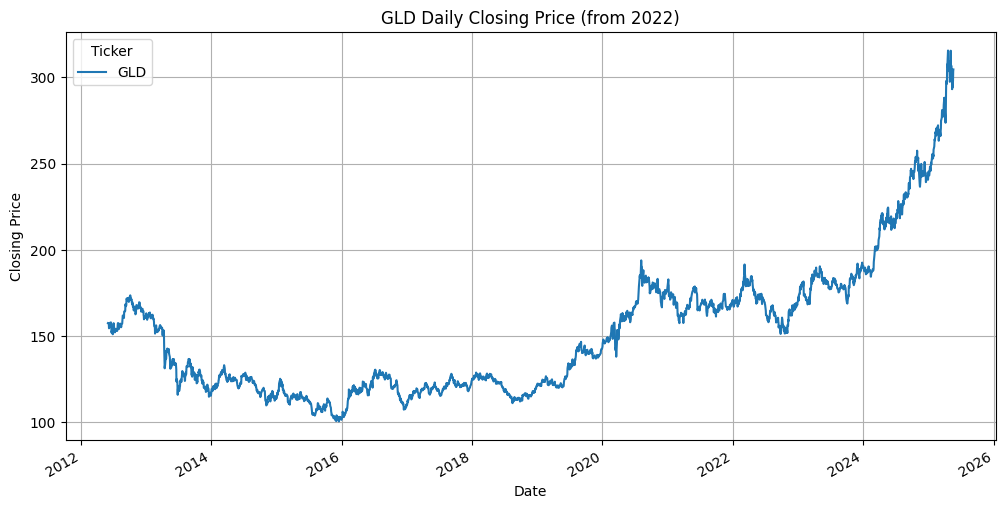

[*********************100%***********************]  1 of 1 completed


Data for CPER:
Price           Close       High        Low       Open Volume
Ticker           CPER       CPER       CPER       CPER   CPER
Date                                                         
2012-06-01  23.379999  23.379999  23.379999  23.379999    300
2012-06-04  23.400000  23.400000  23.400000  23.400000    600
2012-06-05  23.270000  23.280001  23.139999  23.280001   1900
2012-06-06  23.610001  23.650000  23.500000  23.500000    700
2012-06-07  23.969999  23.969999  23.969999  23.969999    200


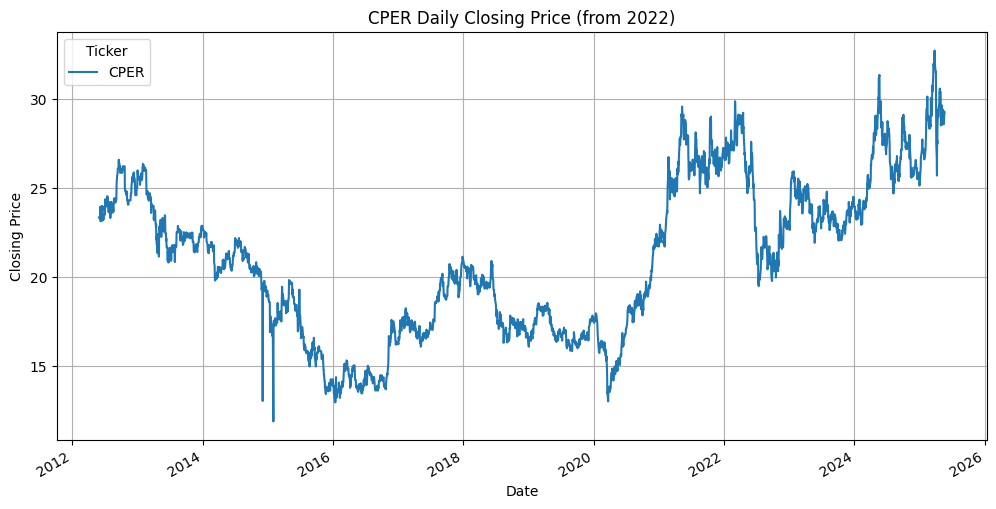

[*********************100%***********************]  1 of 1 completed

Data for USO:
Price            Close        High         Low        Open   Volume
Ticker             USO         USO         USO         USO      USO
Date                                                               
2012-06-01  251.440002  254.960007  248.240005  253.600006  1827250
2012-06-04  254.080002  254.479996  249.839996  250.720001  1482438
2012-06-05  254.080002  254.639999  252.479996  252.880005   928925
2012-06-06  257.200012  260.079987  255.600006  256.720001  1311325
2012-06-07  253.759995  262.399994  252.880005  262.160004  1021538


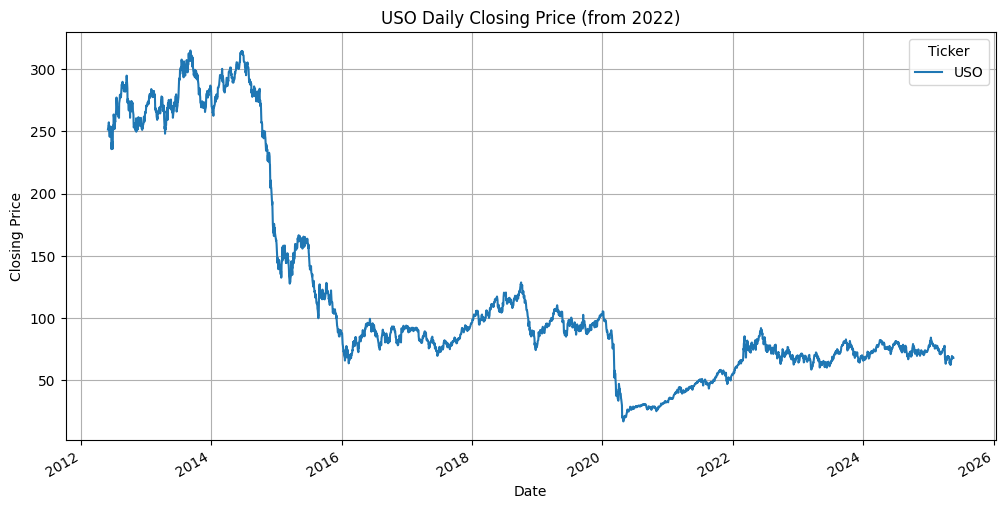

[*********************100%***********************]  1 of 1 completed

Data for UNG:
Price            Close        High         Low        Open  Volume
Ticker             UNG         UNG         UNG         UNG     UNG
Date                                                              
2012-06-01  258.880005  263.839996  257.440002  263.519989  639356
2012-06-04  270.079987  270.720001  263.679993  265.920013  556381
2012-06-05  270.720001  275.359985  269.600006  274.880005  448575
2012-06-06  269.440002  275.519989  267.040009  271.839996  417381
2012-06-07  252.960007  268.320007  251.839996  267.200012  792531


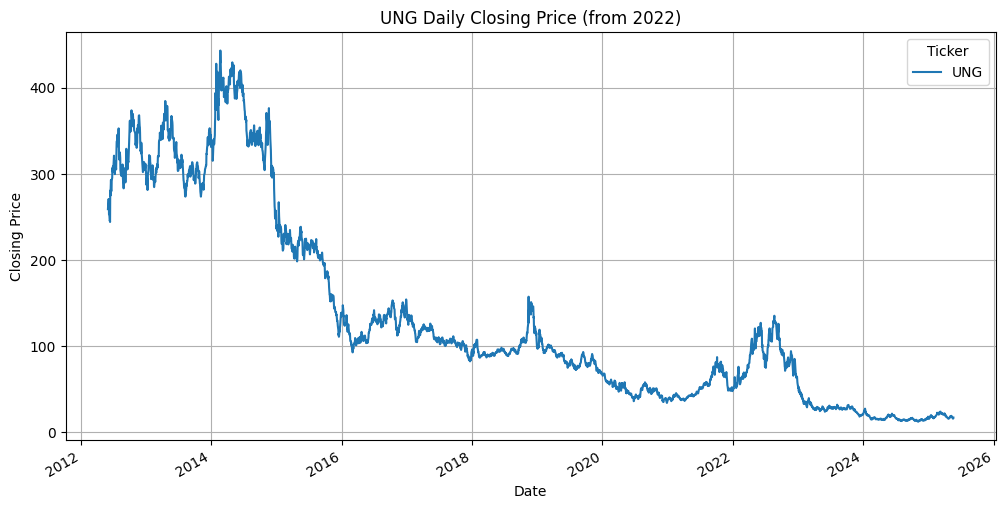

[*********************100%***********************]  1 of 1 completed

Data for JJN:
Price           Close       High        Low       Open Volume
Ticker            JJN        JJN        JJN        JJN    JJN
Date                                                         
2018-01-17  16.866671  16.866671  16.866671  16.866671      0
2018-01-18  16.866671  16.866671  16.866671  16.866671    300
2018-01-19  16.866671  16.866671  16.866671  16.866671      0
2018-01-22  16.866671  16.866671  16.866671  16.866671      0
2018-01-23  16.866671  16.866671  16.866671  16.866671      0


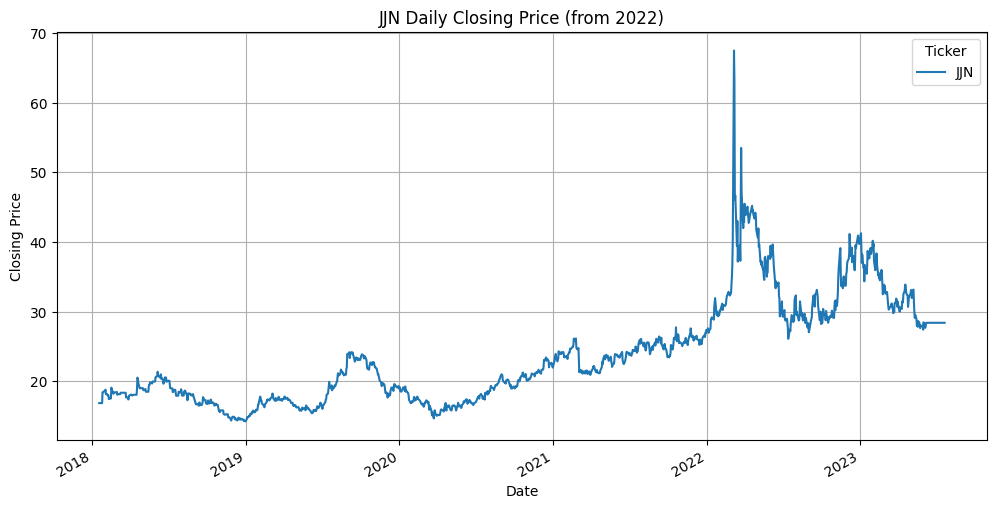

LIT columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
REMX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
URA columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDX columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GDXJ columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
XLE columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
ICLN columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
SPY columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GLD columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
CPER columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
USO columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
UNG columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
JJN columns: Index(['Open', 'High', 'Low', 'Clos

In [5]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG',  'JJN']#'KOL',

# Fetch data from Yahoo Finance
all_data = {}
for symbol in symbols:
    # Download data
    data = yf.download(symbol, start='2012-06-01')
    all_data[symbol] = data
    
    # Print the first few rows of the dataset
    print(f"Data for {symbol}:")
    print(data.head())
    
    # Plot the data
    data['Close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2022)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

# Adjust column names based on the number of columns
for symbol, df in all_data.items():
    if symbol == 'KOL' and len(df.columns) == 6:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    else:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Verify the column names
for symbol, df in all_data.items():
    print(f"{symbol} columns: {df.columns}")

In [6]:
all_data['LIT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['REMX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['URA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GDX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['XLE'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['ICLN'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['SPY'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GLD'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['CPER'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['USO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['UNG'].columns = ['open', 'high', 'low', 'close', 'volume']
# all_data['KOL'].columns = ['open', 'high', 'low', 'close', 'volume']#
all_data['JJN'].columns = ['open', 'high', 'low', 'close', 'volume']


Data for LIT:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2012-06-01  21.947441  22.467204  21.913907  22.467204   32450      NaN   
2012-06-04  22.098343  22.316309  21.729478  21.980976   27750      NaN   
2012-06-05  22.366608  22.400140  21.964210  21.964210   11050      NaN   
2012-06-06  23.070803  23.070803  22.802538  22.836070   11150      NaN   
2012-06-07  23.204941  23.506740  23.137875  23.489973   23100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-06     NaN     NaN     NaN      NaN  ...       0        0       1 

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 244310.19824535  255369.97607346  540036.31938276 ... 4723933.33333333
 4840808.08410645 2548272.61252085]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 610747.55021545  172585.32240546  277031.57849185 ... 4995304.75845337
 5519009.86862183 8381939.78691101]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__ge

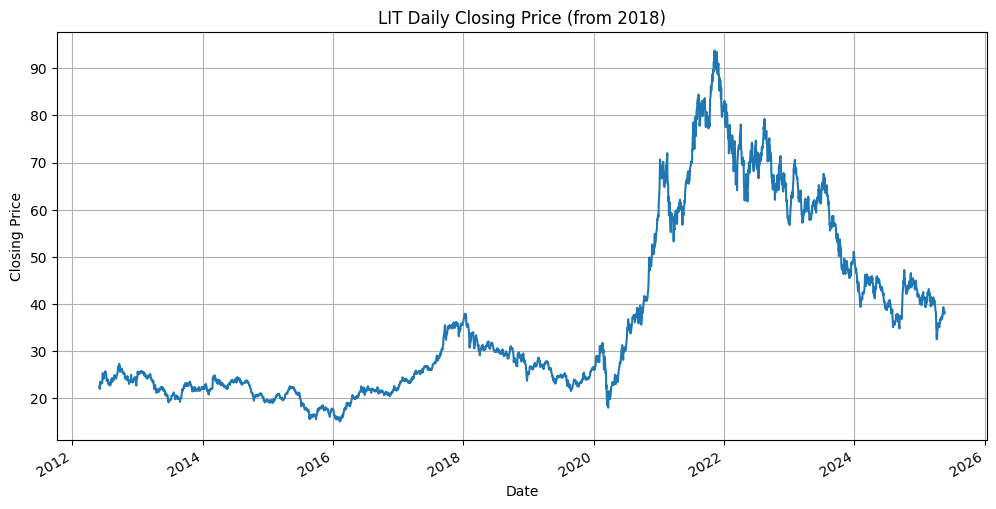

Number of technical indicators successfully added to LIT: 39

Data for REMX:
                  open        high         low       close  volume  SMA_100  \
Date                                                                          
2012-06-01  109.274994  110.850277  109.274994  110.021183    6533      NaN   
2012-06-04  109.274994  109.689536  107.948440  109.440807    8442      NaN   
2012-06-05  112.259720  112.425543  109.606612  110.021165   13325      NaN   
2012-06-06  114.829918  115.576106  113.420458  113.420458    8958      NaN   
2012-06-07  114.166679  117.648883  114.083762  116.902694    8492      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0     

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1474870.16380689 1022457.22777291  986870.43360809 ... 2379610.05274455
 4930767.0501709  5072000.16123454]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 920399.69405527 1808531.12385828  612280.43165829 ... 4350252.562205
 1191486.67462667 1258689.924263  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__geti

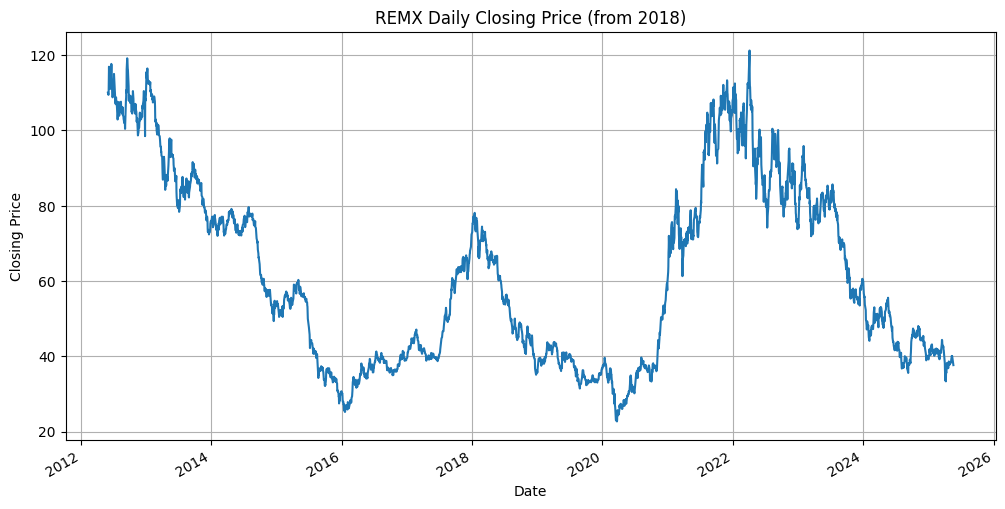

Number of technical indicators successfully added to REMX: 39

Data for URA:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2012-06-01  28.713022  29.003051  28.505855  29.003051   29417      NaN   
2012-06-04  28.008665  28.754457  27.677202  28.422993   34350      NaN   
2012-06-05  28.878757  28.878757  28.050098  28.050098   15317      NaN   
2012-06-06  29.831718  30.038883  29.127358  29.334522   26117      NaN   
2012-06-07  29.624556  30.536080  29.624556  30.121749   18100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-06  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  433874.21210334   770458.14287023   544703.7218501  ...
 62002784.42993164 64922470.52764893 61259033.57487488]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  971585.76367554   387166.64616331   524075.52569999 ...
 84904335.3729248  59378017.94579823 57192681.87840779]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning:

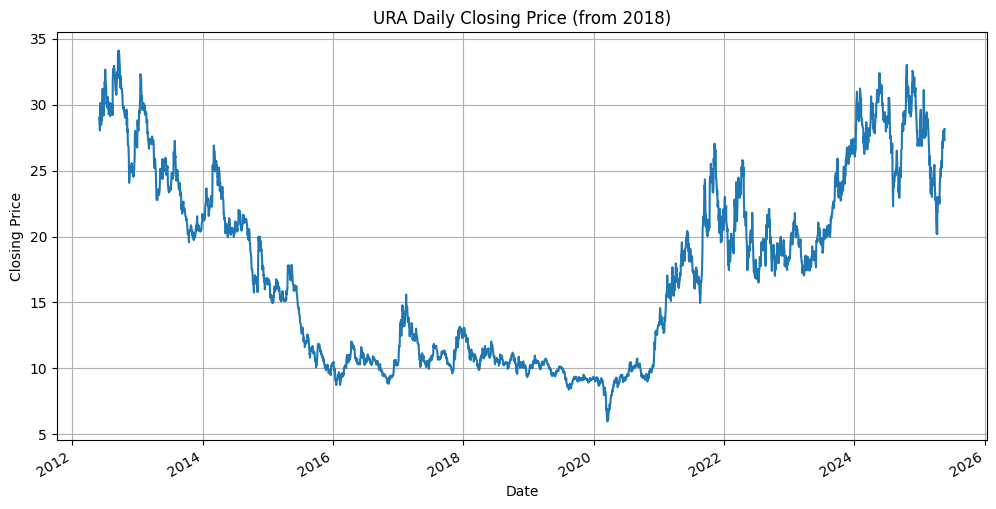

Number of technical indicators successfully added to URA: 39

Data for GDX:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2012-06-01  41.095730  41.351583  39.507657  39.551773  35430300      NaN   
2012-06-04  41.757420  41.775062  40.460495  41.395689  20460800      NaN   
2012-06-05  41.933868  41.995626  41.333931  41.554496  14154900      NaN   
2012-06-06  42.013271  42.983761  41.386867  42.683792  24414600      NaN   
2012-06-07  40.575188  42.127966  40.081120  42.083853  28584100      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.43198065e+08 5.89240427e+08 1.03399427e+09 ... 9.21126090e+08
 1.28791135e+09 5.21634958e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.18426727e+09 5.82204716e+08 6.23576269e+08 ... 1.04053673e+09
 1.21720903e+09 7.88812230e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

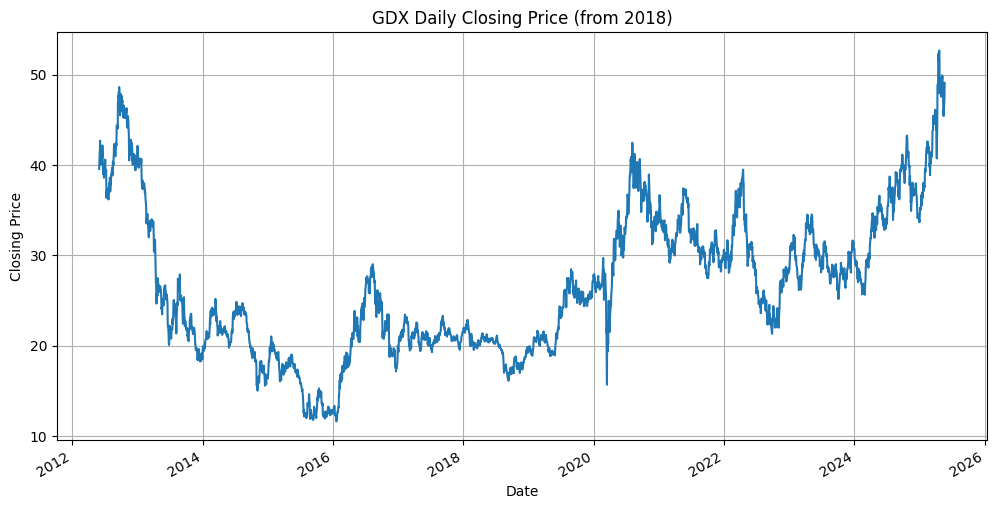

Number of technical indicators successfully added to GDX: 39

Data for GDXJ:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2012-06-01  68.617355  68.883056  65.462150  65.495364  2447050      NaN   
2012-06-04  68.982704  69.181978  67.288858  69.115552  1155525      NaN   
2012-06-05  70.875832  71.075106  69.148771  69.148771  1312275      NaN   
2012-06-06  71.805779  73.665686  70.410846  72.702516  1601125      NaN   
2012-06-07  69.248398  72.569664  68.252014  72.436810  1444075      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.91867368e+07 9.15848308e+07 1.15696784e+08 ... 3.07413911e+08
 4.66015172e+08 1.23667781e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.02653750e+08 3.94951444e+07 7.73250637e+07 ... 2.88488489e+08
 4.57298302e+08 3.01421339e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

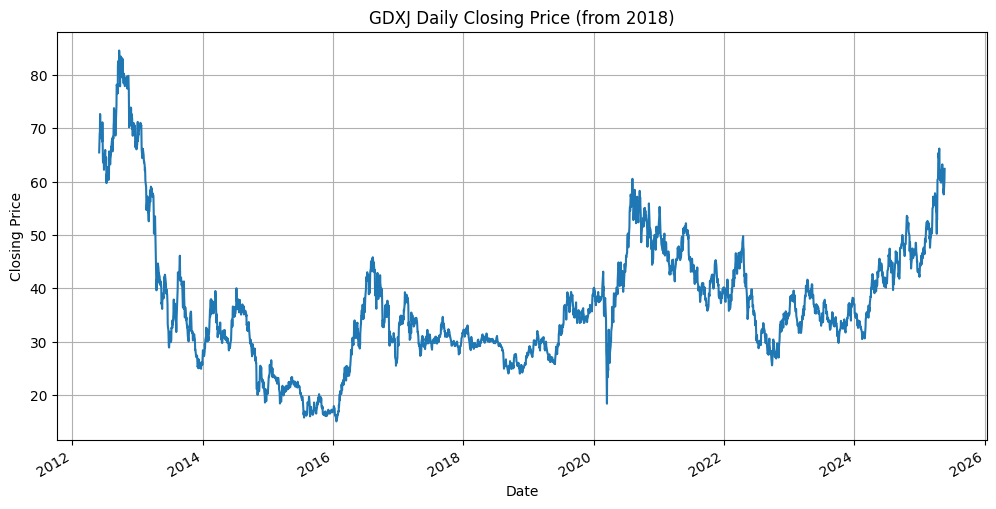

Number of technical indicators successfully added to GDXJ: 39

Data for XLE:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2012-06-01  38.985676  39.419268  38.935403  39.180477  19510300      NaN   
2012-06-04  38.954258  39.255888  38.401269  39.136491  19034900      NaN   
2012-06-05  39.287315  39.544958  38.847438  38.866289  15802300      NaN   
2012-06-06  40.500118  40.537825  39.702057  39.702057  20784000      NaN   
2012-06-07  40.525246  41.398715  40.443556  41.027964  14686000      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.17652302e+08 8.30957762e+08 6.01490760e+08 ... 1.38760988e+09
 1.23921385e+09 9.27908926e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.41051801e+08 6.27007887e+08 5.84627758e+08 ... 1.04675500e+09
 9.56620815e+08 5.04062503e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

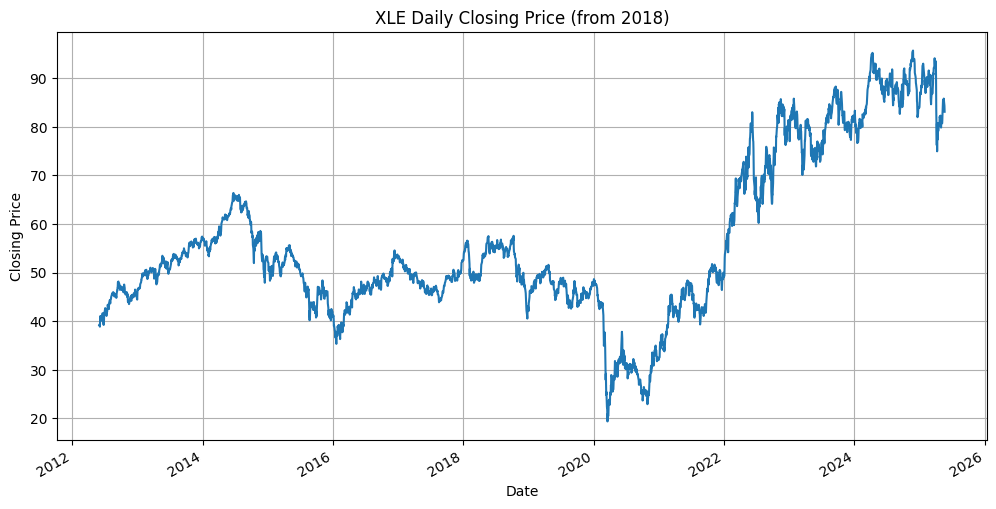

Number of technical indicators successfully added to XLE: 39

Data for ICLN:
                open      high       low     close  volume  SMA_100  EMA_20  \
Date                                                                          
2012-06-01  5.233100  5.309384  5.233100  5.255985   28200      NaN     NaN   
2012-06-04  5.217843  5.286499  5.194958  5.286499   10800      NaN     NaN   
2012-06-05  5.278871  5.309385  5.248357  5.263614    5600      NaN     NaN   
2012-06-06  5.385668  5.393297  5.347526  5.347526   12400      NaN     NaN   
2012-06-07  5.393297  5.522980  5.385668  5.522980   20900      NaN     NaN   

            WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
2012-06-01     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN      NaN  ...       0        0       1   
2012-06-06     NaN     N

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.95331985e+04 6.64985117e+04 1.14473671e+05 ... 3.54077226e+07
 2.23394383e+07 1.91299238e+07]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   56764.63761361    39684.59776259    76724.16851512 ...
 16851817.11591085 24437680.77526093  8598675.5900898 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem_

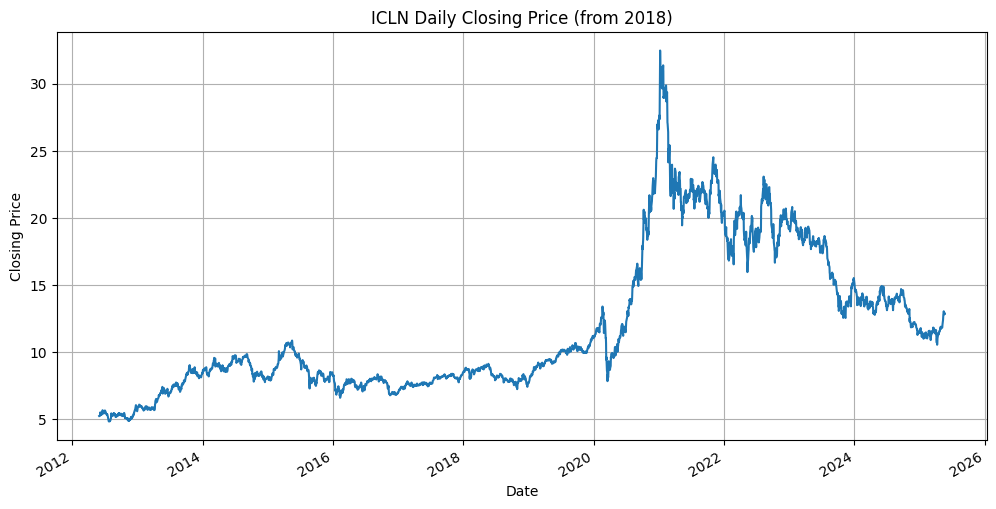

Number of technical indicators successfully added to ICLN: 39

Data for SPY:
                  open        high         low       close     volume  \
Date                                                                    
2012-06-01  101.413147  104.056090  101.413147  102.402273  253240900   
2012-06-04  101.365669  101.872101  100.606015  101.595141  202545800   
2012-06-05  102.133255  102.283592  101.112470  101.167861  164149400   
2012-06-06  104.428001  104.475478  102.813740  102.845399  184202800   
2012-06-07  104.491341  105.662463  104.277686  105.614987  184772700   

            SMA_100  EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  \
Date                                                  ...                    
2012-06-01      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2012-06-04      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2012-06-05      NaN     NaN     NaN     NaN      NaN  ...       0        0   
2012-06-06      NaN  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.66646617e+10 1.90425550e+10 1.94353248e+10 ... 3.89377992e+10
 4.49982538e+10 3.57992379e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.05295871e+10 1.50371476e+10 1.90011700e+10 ... 4.18493397e+10
 4.02589511e+10 1.73440958e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

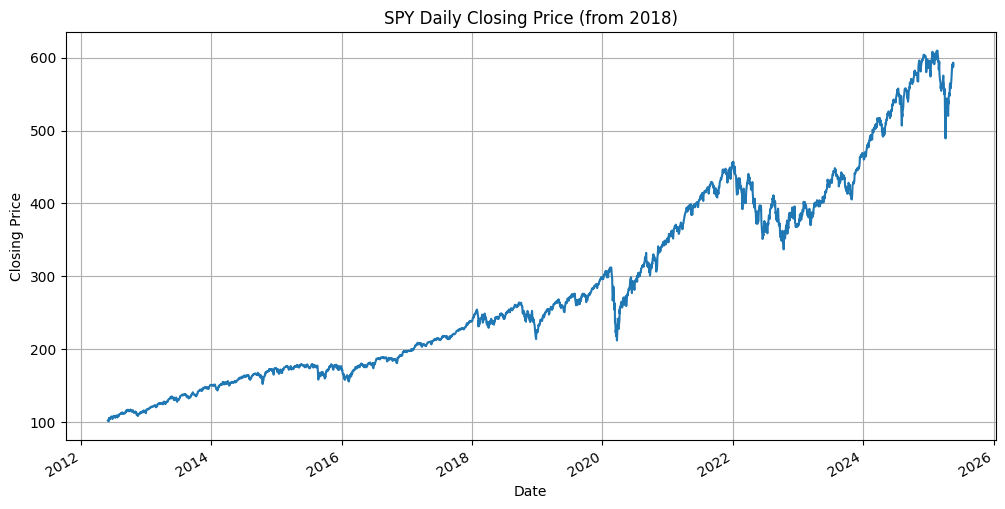

Number of technical indicators successfully added to SPY: 39

Data for GLD:
                  open        high         low       close    volume  SMA_100  \
Date                                                                            
2012-06-01  157.500000  158.309998  154.869995  155.410004  27399400      NaN   
2012-06-04  157.320007  157.440002  156.160004  157.259995  11462100      NaN   
2012-06-05  157.139999  157.270004  156.419998  156.919998   8095300      NaN   
2012-06-06  157.210007  159.199997  156.589996  158.899994  15771600      NaN   
2012-06-07  154.500000  157.839996  153.190002  157.820007  18921600      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.79901480e+09 2.49554020e+09 1.41709525e+09 ... 3.46934229e+09
 3.84566950e+09 1.96984905e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.26990971e+09 2.95713076e+09 1.70127388e+09 ... 4.28698920e+09
 4.34363072e+09 4.15259442e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

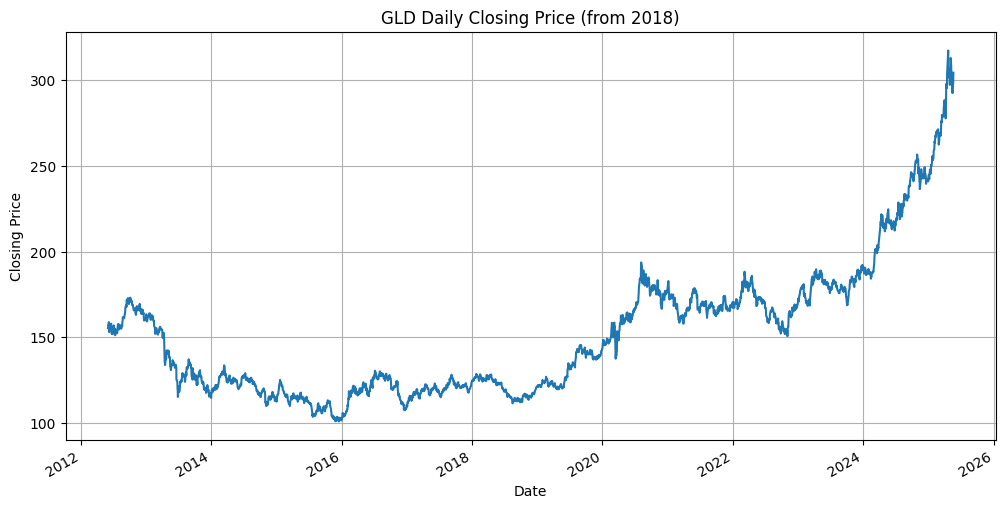

Number of technical indicators successfully added to GLD: 39

Data for CPER:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2012-06-01  23.379999  23.379999  23.379999  23.379999     300      NaN   
2012-06-04  23.400000  23.400000  23.400000  23.400000     600      NaN   
2012-06-05  23.270000  23.280001  23.139999  23.280001    1900      NaN   
2012-06-06  23.610001  23.650000  23.500000  23.500000     700      NaN   
2012-06-07  23.969999  23.969999  23.969999  23.969999     200      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-06  

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.40399998e+04 1.64849999e+04 4.79399986e+03 ... 4.66584768e+06
 4.93995345e+06 2.12442553e+06]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  44143.33381653    9279.99979655       0.         ... 2773355.96110026
 3899856.03103638 6534014.88520304]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ trea

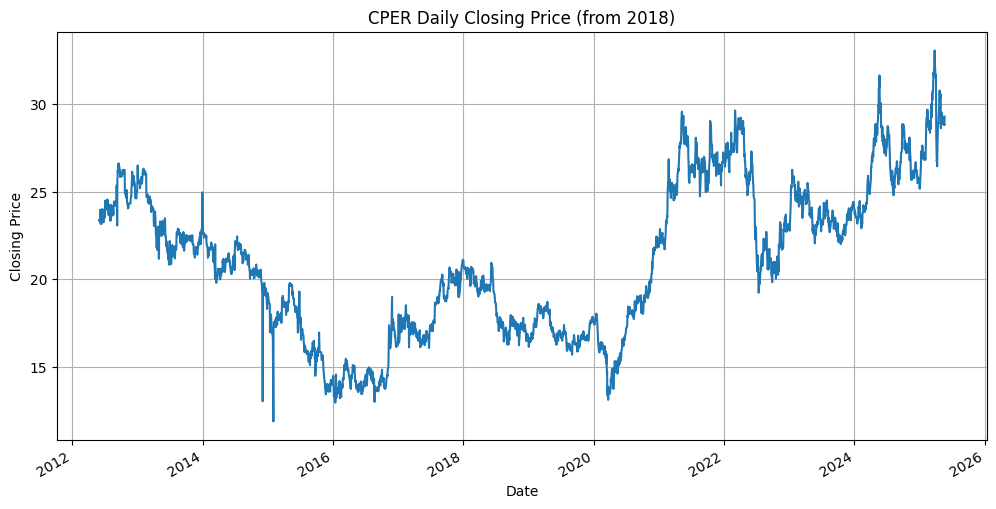

Number of technical indicators successfully added to CPER: 39


/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.35327667e+08 3.37622474e+08 2.64728168e+08 ... 2.56055343e+08
 3.51175601e+08 2.21497401e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.73099993e+08 2.79381142e+08 2.12172509e+08 ... 2.56998297e+08
 3.54525092e+08 1.85718862e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as


Data for USO:
                  open        high         low       close   volume  SMA_100  \
Date                                                                           
2012-06-01  251.440002  254.960007  248.240005  253.600006  1827250      NaN   
2012-06-04  254.080002  254.479996  249.839996  250.720001  1482438      NaN   
2012-06-05  254.080002  254.639999  252.479996  252.880005   928925      NaN   
2012-06-06  257.200012  260.079987  255.600006  256.720001  1311325      NaN   
2012-06-07  253.759995  262.399994  252.880005  262.160004  1021538      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-06     NaN     NaN     NaN     

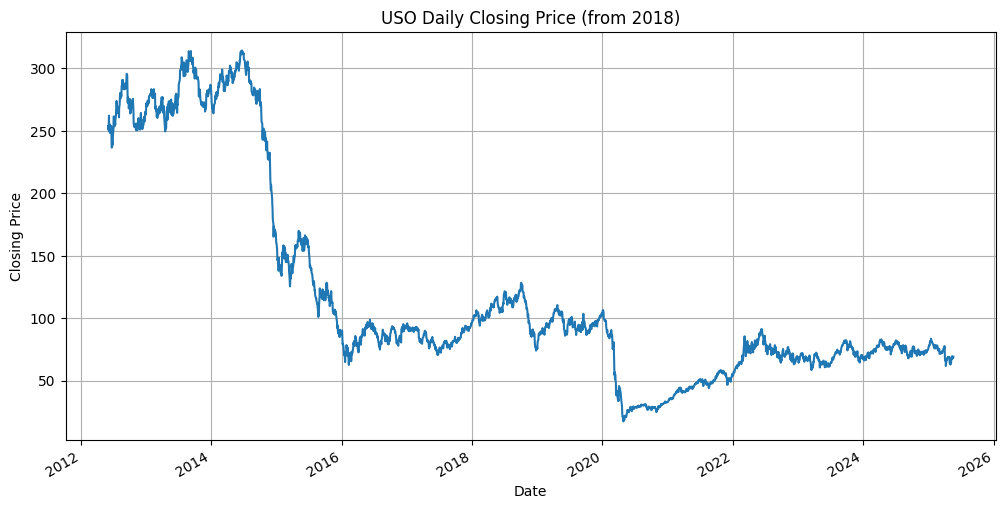

Number of technical indicators successfully added to USO: 39

Data for UNG:
                  open        high         low       close  volume  SMA_100  \
Date                                                                          
2012-06-01  258.880005  263.839996  257.440002  263.519989  639356      NaN   
2012-06-04  270.079987  270.720001  263.679993  265.920013  556381      NaN   
2012-06-05  270.720001  275.359985  269.600006  274.880005  448575      NaN   
2012-06-06  269.440002  275.519989  267.040009  271.839996  417381      NaN   
2012-06-07  252.960007  268.320007  251.839996  267.200012  792531      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-06-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-06-05     NaN     NaN     NaN      NaN  ...       0      

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.48427615e+08 1.22586575e+08 4.43851887e+08 ... 1.08777190e+08
 1.29585657e+08 7.43964570e+07]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.13305028e+08 2.08002407e+08 9.50599886e+07 ... 1.07015499e+08
 7.41169661e+07 1.36978737e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=14, append=True)
/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:232: FutureWarning: Series.__getitem__ treating keys as

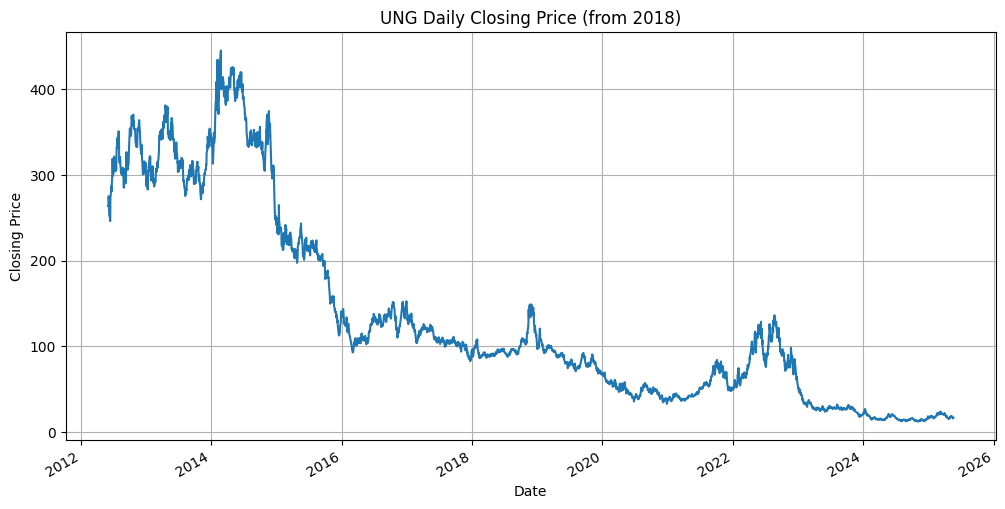

Number of technical indicators successfully added to UNG: 39

Data for JJN:
                 open       high        low      close  volume  SMA_100  \
Date                                                                      
2018-01-17  16.866671  16.866671  16.866671  16.866671       0      NaN   
2018-01-18  16.866671  16.866671  16.866671  16.866671     300      NaN   
2018-01-19  16.866671  16.866671  16.866671  16.866671       0      NaN   
2018-01-22  16.866671  16.866671  16.866671  16.866671       0      NaN   
2018-01-23  16.866671  16.866671  16.866671  16.866671       0      NaN   

            EMA_20  WMA_20  HMA_20  VWMA_20  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2018-01-17     NaN     NaN     NaN      NaN  ...       0        0       1   
2018-01-18     NaN     NaN     NaN      NaN  ...       0        0       1   
2018-01-19     NaN     NaN     NaN      NaN  ...       0        0       1   
2018-01-22   

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_5484/824984708.py:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.42373291e+04 1.67249971e+04 5.63800011e+04 0.00000000e+00
 1.57799978e+04 4.67296029e+04 4.42240005e+04 2.77066641e+04
 1.63320024e+04 8.25949974e+04 0.00000000e+00 5.53830906e+03
 1.61673889e+05 0.00000000e+00 3.79540062e+04 5.11739885e+04
 3.33125550e+05 2.61691187e+04 0.00000000e+00 0.00000000e+00
 1.01812500e+04 1.89051657e+04 1.15799995e+04 5.84315987e+03
 5.95326004e+03 5.92884314e+05 0.00000000e+00 4.30779012e+04
 8.72992603e+04 7.39094953e+04 7.11538920e+05 1.06822259e+05
 1.56504089e+04 1.00618658e+05 4.02917269e+04 2.23535454e+04
 4.29247390e+04 0.00000000e+00 1.17508525e+05 0.00000000e+00
 5.49795015e+04 0.00000000e+00 1.28357167e+04 8.51436663e+04
 0.00000000e+00 6.44418268e+04 5.22540755e+04 3.03321755e+05
 1.41087006e+04 1.30425000e+04 1.27142701e+04 5.52454581e

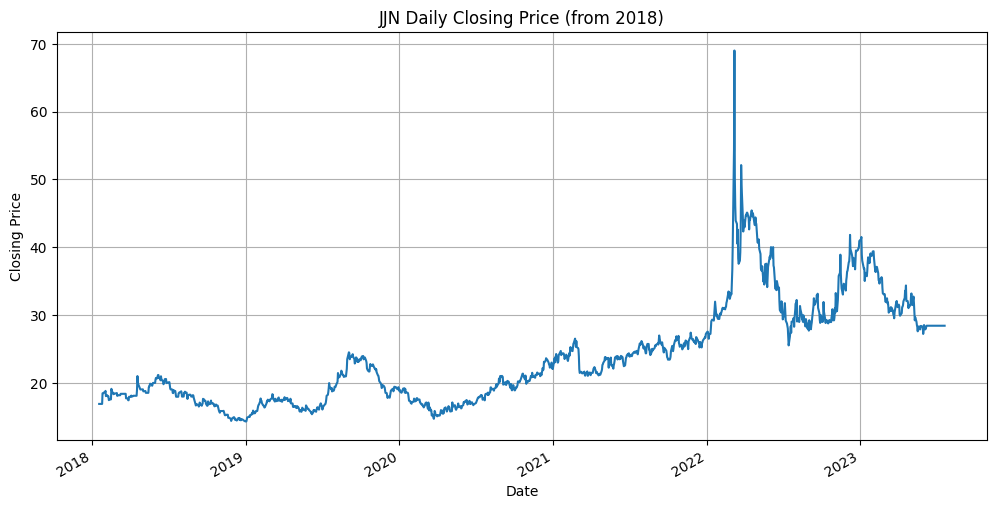

Number of technical indicators successfully added to JJN: 39


In [7]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=12, slow=26, signal=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=14, d=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=7, multiplier=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.02, max_step=0.2, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=20, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=20, scalar=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=20, upper_length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=3, slow=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=9, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=5, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [8]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for LIT after renaming:
Index(['LIT_open', 'LIT_high', 'LIT_low', 'LIT_close', 'LIT_volume',
       'LIT_SMA_100', 'LIT_EMA_20', 'LIT_WMA_20', 'LIT_HMA_20', 'LIT_VWMA_20',
       'LIT_MACD_12_26_9', 'LIT_MACDh_12_26_9', 'LIT_MACDs_12_26_9',
       'LIT_ADX_14', 'LIT_DMP_14', 'LIT_DMN_14', 'LIT_CCI_20_0.015',
       'LIT_RSI_14', 'LIT_STOCHk_14_3_3', 'LIT_STOCHd_14_3_3', 'LIT_ISA_9',
       'LIT_ISB_26', 'LIT_ITS_9', 'LIT_IKS_26', 'LIT_ICS_26',
       'LIT_SUPERT_7_3.0', 'LIT_SUPERTd_7_3.0', 'LIT_SUPERTl_7_3.0',
       'LIT_SUPERTs_7_3.0', 'LIT_PSARl_0.02_0.2', 'LIT_PSARs_0.02_0.2',
       'LIT_PSARaf_0.02_0.2', 'LIT_PSARr_0.02_0.2', 'LIT_MOM_50', 'LIT_ROC_10',
       'LIT_WILLR_14', 'LIT_UO_7_14_28', 'LIT_AO_5_34', 'LIT_KAMA_10_2_30',
       'LIT_CG_10', 'LIT_BBL_20_2.0', 'LIT_BBM_20_2.0', 'LIT_BBU_20_2.0',
       'LIT_BBB_20_2.0', 'LIT_BBP_20_2.0', 'LIT_ATRr_14', 'LIT_KCLe_20_2.0',
       'LIT_KCBe_20_2.0', 'LIT_KCUe_20_2.0', 'LIT_DCL_20_20', 'LIT_DCM_20_20',
       'LIT_DCU_

In [9]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
             LIT_open   LIT_high    LIT_low  LIT_close  LIT_volume  \
Date                                                                 
2012-06-01  21.947441  22.467204  21.913907  22.467204       32450   
2012-06-04  22.098343  22.316309  21.729478  21.980976       27750   
2012-06-05  22.366608  22.400140  21.964210  21.964210       11050   
2012-06-06  23.070803  23.070803  22.802538  22.836070       11150   
2012-06-07  23.204941  23.506740  23.137875  23.489973       23100   

            LIT_SMA_100  LIT_EMA_20  LIT_WMA_20  LIT_HMA_20  LIT_VWMA_20  ...  \
Date                                                                      ...   
2012-06-01          NaN         NaN         NaN         NaN          NaN  ...   
2012-06-04          NaN         NaN         NaN         NaN          NaN  ...   
2012-06-05          NaN         NaN         NaN         NaN          NaN  ...   
2012-06-06          NaN         NaN         NaN         NaN          NaN  ...   

In [10]:
merged_data


,LIT_open,LIT_high,LIT_low,LIT_close,LIT_volume,LIT_SMA_100,LIT_EMA_20,LIT_WMA_20,LIT_HMA_20,LIT_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-01,21.947441,22.467204,21.913907,22.467204,32450,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-04,22.098343,22.316309,21.729478,21.980976,27750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-05,22.366608,22.400140,21.964210,21.964210,11050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-06,23.070803,23.070803,22.802538,22.836070,11150,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-07,23.204941,23.506740,23.137875,23.489973,23100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,38.740002,38.970001,38.470001,38.820000,128900,39.510296,37.448244,37.555428,38.613898,36.994942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-16,38.580002,38.599998,38.299999,38.480000,143500,39.475799,37.546506,37.702047,38.847856,37.147546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-19,38.200001,38.259998,37.889999,37.889999,220500,39.439290,37.579220,37.776428,38.924853,37.312762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data

,JJN_open,JJN_high,JJN_low,JJN_close,JJN_volume,JJN_SMA_100,JJN_EMA_20,JJN_WMA_20,JJN_HMA_20,JJN_VWMA_20,...,JJN_SQZ_ON,JJN_SQZ_OFF,JJN_SQZ_NO,JJN_FISHERT_9_1,JJN_FISHERTs_9_1,JJN_LDECAY_5,JJN_VTXP_14,JJN_VTXM_14,JJN_ZS_20,JJN_ENTP_10
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-17,16.866671,16.866671,16.866671,16.866671,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.866671,NaN,NaN,NaN,NaN
2018-01-18,16.866671,16.866671,16.866671,16.866671,300,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.866671,NaN,NaN,NaN,NaN
2018-01-19,16.866671,16.866671,16.866671,16.866671,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.866671,NaN,NaN,NaN,NaN
2018-01-22,16.866671,16.866671,16.866671,16.866671,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.866671,NaN,NaN,NaN,NaN
2018-01-23,16.866671,16.866671,16.866671,16.866671,0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,16.866671,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,28.400000,28.400000,28.400000,28.400000,0,30.188241,28.419565,28.4,28.4,NaN,...,0,0,1,-7.513169,-7.425936,28.400000,0.0,0.0,NaN,3.321928
2023-07-18,28.400000,28.400000,28.400000,28.400000,0,30.117941,28.417701,28.4,28.4,NaN,...,0,0,1,-7.556786,-7.513169,28.400000,0.0,0.0,NaN,3.321928
2023-07-19,28.400000,28.400000,28.400000,28.400000,0,30.061941,28.416015,28.4,28.4,NaN,...,0,0,1,-7.578594,-7.556786,28.400000,0.0,0.0,NaN,3.321928


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import iqr

def fill_nan_with_rolling_median(data, window_size=21):
    """
    Fill NaN values in a DataFrame using forward fill first, then rolling median.
    Any remaining NaNs (e.g., at the start) are set to zero.
    """
    # Forward fill first
    data_ffill = data.ffill()
    # Fill remaining NaNs with rolling median
    data_filled = data_ffill.apply(lambda x: x.fillna(x.rolling(window=window_size, min_periods=1).median()), axis=0)
    # Fill any remaining NaNs (e.g., at the very start) with zero
    data_filled = data_filled.fillna(0)
    return data_filled

# Usage example with your existing pipeline
# First handle missing values
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

In [ ]:
merged_data_filled.describe()

In [ ]:
pd.set_option('display.max_rows', None)
merged_data_filled.isna().sum().transpose()

In [26]:
pd.reset_option('display.max_rows')

In [ ]:
print(merged_data_filled.shape)

In [ ]:


# Print statistics to prove no NaNs remain
print('NaN count per column after filling:')
print(merged_data_filled.isna().sum())
print('Any NaNs left in data:', merged_data_filled.isna().any().any())
print('Any zeros in data:', (merged_data_filled == 0).any().any())

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    Automatically detects and applies optimal scaling for financial time series features.
    Handles mixed-scale features like RSI (0-100) and ATR (volatility) without hardcoding.
    """
    
    def __init__(self):
        self.scalers = {}
        self.feature_stats = {}

    def _auto_detect_scaler(self, data):
        """Heuristic-based scaler selection using financial data characteristics"""
        # Calculate distribution properties
        q1, q3 = np.percentile(data, [25, 75])
        iqr_val = q3 - q1
        range_val = np.max(data) - np.min(data)
        has_outliers = (iqr_val > 0) and (range_val / iqr_val > 4)
        
        # Check for common financial indicator ranges
        is_bounded = (
            (np.min(data) >= 0) and 
            (np.max(data) <= 100) and 
            (range_val >= 50)  # Typical for RSI-like features
        )
        
        if is_bounded:
            return MinMaxScaler(feature_range=(0, 1)), 'minmax'
        elif has_outliers:
            return RobustScaler(), 'robust'
        else:
            return StandardScaler(), 'standard'

    def fit(self, X, y=None):
        for col in X.columns:
            column_data = X[col].values.reshape(-1, 1)
            scaler, scaler_type = self._auto_detect_scaler(column_data)
            self.scalers[col] = scaler.fit(column_data)
            
            # Store metadata for MLOps monitoring
            self.feature_stats[col] = {
                'min': np.min(column_data),
                'max': np.max(column_data),
                'iqr': iqr(column_data),
                'scaler': scaler_type
            }
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for col, scaler in self.scalers.items():
            X_scaled[col] = scaler.transform(X_scaled[col].values.reshape(-1, 1)).flatten()
        return X_scaled

    def get_feature_stats(self):
        """For MLOps monitoring and model interpretation"""
        return pd.DataFrame(self.feature_stats).T



In [29]:
# Define the target column
target_column = 'LIT_close'  # Replace with your actual target column name

# Instantiate the FeatureScaler
feature_scaler = FeatureScaler()

# Fit the scaler to the data excluding the target column
feature_scaler.fit(merged_data_filled.drop(columns=[target_column]))

# Transform the data excluding the target column
scaled_features = feature_scaler.transform(merged_data_filled.drop(columns=[target_column]))

# Combine the scaled features with the unscaled target column
scaled_data_df = pd.DataFrame(scaled_features, columns=merged_data_filled.columns.drop(target_column), index=merged_data_filled.index)
scaled_data_df[target_column] = merged_data_filled[target_column]


In [ ]:
scaled_data_df

In [ ]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'LIT_close' # < remove hardcording to make any symbol feasible at target stock price ?

columns_to_drop = ['LIT_high', 'LIT_low', 'LIT_open']

if target_column in scaled_data_df.columns:
    scaled_data_df['LIT_target'] = scaled_data_df[target_column].shift(-1)

    scaled_data_df.dropna(subset=['LIT_target'], inplace=True)

    X = scaled_data_df.drop(columns=['LIT_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = scaled_data_df['LIT_target']

    train_size = int(len(scaled_data_df) * 0.8)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [33]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=5)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

change the model training to XGB, LSTM (with layers added and remove in optimizing?, SVM, ARIMA GARCH+ML, CNN+LSTM? )

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Purged K-Fold implementation (López de Prado method)
def purged_kfold_split(data, n_splits=3, purging_window=timedelta(days=1)):
    """
    Implementation of Purged K-fold cross-validation following Marcos López de Prado's
    methodology to prevent forward-looking bias in financial time series.
    
    Parameters:
    -----------
    data : DataFrame with DatetimeIndex
        The data to split
    n_splits : int, default=5
        Number of folds
    purging_window : timedelta, default=timedelta(days=1)
        Window to purge around test set
        
    Returns:
    --------
    Generator of train_indices, test_indices for each fold
    """
    kf = KFold(n_splits=n_splits)
    indices = np.arange(len(data))
    dates = data.index

    for train_index, test_index in kf.split(indices):
        test_start_date = dates[test_index[0]]
        test_end_date = dates[test_index[-1]]

        purge_start_date = test_start_date - purging_window
        purge_end_date = test_end_date + purging_window

        train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

        purged_train_index = train_index[train_mask]

        yield purged_train_index, test_index

# Walk-Forward Validation for final model evaluation
class WalkForwardValidator:
    def __init__(self, window_size=252, test_period=21):
        self.window_size = window_size
        self.test_period = test_period
    
    def split(self, X, y):
        """Generate walk-forward splits with daily testing and monthly retraining"""
        total_size = len(X)
        start_idx = 0
        
        while start_idx + self.window_size + self.test_period <= total_size:
            train_end = start_idx + self.window_size
            test_end = train_end + self.test_period
            
            # Yield daily test sets within the test period
            for test_start in range(train_end, test_end):
                yield (
                    X.iloc[start_idx:train_end], 
                    y.iloc[start_idx:train_end],
                    X.iloc[test_start:test_start + 1],
                    y.iloc[test_start:test_start + 1]
                )
            
            # Move the training window forward by the test period
            start_idx += self.test_period

def create_objective(model_type):
    def objective(trial):
        # Load data (already scaled)
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
        
        # Define parameters only for the model being optimized
        if model_type == 'xgboost':
            params = {
                'objective': 'reg:squarederror',
                'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.75),
                'max_depth': trial.suggest_int('max_depth', 3, 30),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 0.8),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
                'random_state': 42
            }
            
            def fit_predict(X_train, y_train, X_test):
                model = xgb.XGBRegressor(**params)
                model.fit(X_train, y_train)
                return model.predict(X_test)
                
        elif model_type == 'svm':
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params = {
                'C': trial.suggest_float('C', 0.05, 100.0, log=True),
                'epsilon': trial.suggest_float('epsilon', 0.01, 1.0),
                'kernel': kernel
            }
            if kernel != 'linear':
                params['gamma'] = trial.suggest_float('gamma', 1e-4, 10.0, log=True)

            import logging

            logging.basicConfig(level=logging.INFO)

            def fit_predict(X_train, y_train, X_test):
                try:
                    logging.info(f"Starting SVM trial with params: {params}")
                    y_train_1d = np.ravel(y_train)
                    model = SVR(**params)
                    model.fit(X_train, y_train_1d)
                    return model.predict(X_test)
                except Exception as e:
                    print(f'SVM error: {e}')
                    return np.ones(len(X_test)) * y_train.mean()
        
        elif model_type == 'lstm':
            params = {
                'hidden_size': trial.suggest_int('hidden_size', 8, 32),
                'num_layers': trial.suggest_int('num_layers', 1, 2),
                'dropout': trial.suggest_float('dropout', 0.1, 0.5),
                'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True),
                'batch_size': 32,
                'epochs': 25
            }
            
            def fit_predict(X_train, y_train, X_test):
                try:
                    # Convert to tensors
                    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                    
                    # Simple LSTM model
                    model = nn.LSTM(
                        input_size=X_train.shape[1],
                        hidden_size=params['hidden_size'],
                        num_layers=params['num_layers'],
                        dropout=params['dropout'],
                        batch_first=True
                    )
                    
                    fc = nn.Linear(params['hidden_size'], 1)
                    optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()], 
                                              lr=params['learning_rate'])
                    
                    # Train
                    model.train()
                    for _ in range(params['epochs']):
                        X_batch = X_train_tensor.unsqueeze(1)
                        outputs, _ = model(X_batch)
                        predictions = fc(outputs[:, -1, :])
                        loss = nn.MSELoss()(predictions, y_train_tensor)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                    
                    # Predict
                    model.eval()
                    with torch.no_grad():
                        X_test_batch = X_test_tensor.unsqueeze(1)
                        test_outputs, _ = model(X_test_batch)
                        predictions = fc(test_outputs[:, -1, :])
                        return predictions.numpy().flatten()
                except Exception as e:
                    print(f"LSTM error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()
                    
        elif model_type == 'arima_garch':
            params = {
                'p' : trial.suggest_int('p', 0, 32),
                'd' : trial.suggest_int('d', 0, 8),
                'q' : trial.suggest_int('q', 0, 32),
                'use_garch' : True  
            }
            
            def fit_predict(X_train, y_train, X_test):
                try:
                    model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                    results = model.fit()
                    return results.forecast(steps=len(X_test))
                except Exception as e:
                    print(f"ARIMA error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()
        
        # Using purged k-fold for hyperparameter optimization
        # This follows López de Prado's approach for preventing leakage
        purging_window = timedelta(days=1)  # 1 trading day
        errors = []
        
        try:
            # Apply purged k-fold cross-validation
            for train_idx, test_idx in purged_kfold_split(X, n_splits=5, purging_window=purging_window):
                X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
                y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
                
                # Skip if not enough data
                if len(X_train_fold) < 50 or len(X_test_fold) < 5:
                    continue
                
                # Apply model
                y_pred = fit_predict(X_train_fold, y_train_fold, X_test_fold)
                
                # Calculate error
                error = mean_squared_error(y_test_fold, y_pred)
                errors.append(error)
                
            # Return mean error across all folds
            if not errors:
                return float('inf')
            return np.mean(errors)
            
        except Exception as e:
            print(f"Error in purged k-fold: {e}")
            return float('inf')
    
    return objective

# Function to evaluate final model performance using walk-forward validation
def evaluate_model(model_type, best_params):
    print(f"\n=== Evaluating {model_type.upper()} with Walk-Forward Validation ===")
    
    # Load data
    X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    
    # Walk-forward validation
    validator = WalkForwardValidator(window_size=252, test_period=21)
    errors = []
    predictions = []
    
    print("Starting walk-forward validation...")
    
    # Create model with best parameters
    if model_type == 'xgboost':
        params = {**best_params, 'objective': 'reg:squarederror', 'random_state': 42}
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = xgb.XGBRegressor(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            
    elif model_type == 'svm':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = SVR(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            
    elif model_type == 'lstm':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                # Convert to tensors
                X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
                
                # Simple LSTM model
                model = nn.LSTM(
                    input_size=X_train.shape[1],
                    hidden_size=params['hidden_size'],
                    num_layers=params['num_layers'],
                    dropout=params['dropout'],
                    batch_first=True
                )
                
                fc = nn.Linear(params['hidden_size'], 1)
                optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()], 
                                          lr=params['learning_rate'])
                
                # Train
                model.train()
                for _ in range(params['epochs']):
                    X_batch = X_train_tensor.unsqueeze(1)
                    outputs, _ = model(X_batch)
                    predictions = fc(outputs[:, -1, :])
                    loss = nn.MSELoss()(predictions, y_train_tensor)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                
                # Predict
                model.eval()
                with torch.no_grad():
                    X_test_batch = X_test_tensor.unsqueeze(1)
                    test_outputs, _ = model(X_test_batch)
                    y_pred = fc(test_outputs[:, -1, :]).numpy().flatten()
                    
                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"LSTM error during evaluation: {e}")
                
    elif model_type == 'arima_garch':
        params = best_params
        
        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                results = model.fit()
                y_pred = results.forecast(steps=len(X_test))
                
                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"ARIMA error during evaluation: {e}")
    
    # Store predictions for analysis
    if len(predictions) > 0:
        pred_df = pd.DataFrame(predictions, columns=['date', 'actual', 'predicted'])
        pred_df.to_csv(f'predictions_{model_type}_walkforward.csv', index=False)
    
    avg_error = np.mean(errors) if errors else float('inf')
    print(f"Average MSE: {avg_error:.6f}")
    return avg_error

# Run optimization
models = ['xgboost', 'svm', 'arima_garch', 'lstm']
best_models = {}

for model_type in models:
    print(f"\nOptimizing {model_type.upper()} using purged k-fold cross-validation...")
    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective(model_type), n_trials=10)
    
    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }
    
    print(f"Best {model_type} trial:")
    print(f"  MSE: {study.best_trial.value:.6f}")
    print("  Params:", study.best_trial.params)

# Compare models using k-fold results
print("\n=== MODEL COMPARISON (Purged K-Fold) ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Evaluate best models with walk-forward validation
print("\n=== FINAL WALK-FORWARD EVALUATION ===")
walk_forward_results = {}

for model_type, results in best_models.items():
    wf_error = evaluate_model(model_type, results['params'])
    walk_forward_results[model_type] = wf_error

# Final comparison
print("\n=== FINAL MODEL COMPARISON (Walk-Forward) ===")
for model_type, error in sorted(walk_forward_results.items(), key=lambda x: x[1]):
    print(f"{model_type.upper()}: MSE = {error:.6f}")

In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import optuna
# from datetime import timedelta
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor

# # Define a function to create an objective function for each model type
# def create_objective(model_type):
#     def objective(trial):
#         X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
#         y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series
        
#         # Define parameters based on model type
#         if model_type == 'xgboost':
#             params = {
#                 'objective': 'reg:squarederror',
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#                 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
#                 'gamma': trial.suggest_float('gamma', 0, 0.5),
#                 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#                 'random_state': 42
#             }
#             model_class = xgb.XGBRegressor
            
#         elif model_type == 'random_forest':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = RandomForestRegressor
            
#         elif model_type == 'extra_trees':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = ExtraTreesRegressor
            
#         elif model_type == 'hist_gradient_boosting':
#             params = {
#                 'max_iter': trial.suggest_int('max_iter', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
#                 'random_state': 42
#             }
#             model_class = HistGradientBoostingRegressor
            
#         n_splits = 3
#         purging_window = timedelta(days=5) # Adjust as needed
#         fold_errors = []

#         # Perform purged k-fold cross-validation
#         for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
#             X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
#             y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

#             model = model_class(**params)
#             model.fit(X_train_fold, y_train_fold)

#             y_pred_fold = model.predict(X_test_fold)
#             mse = mean_squared_error(y_test_fold, y_pred_fold)
#             fold_errors.append(mse)

#         return np.mean(fold_errors)
    
#     return objective

# # Dictionary to store the best trials for each model
# best_models = {}

# # List of models to evaluate
# models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting']

# # Run optimization for each model
# for model_type in models:
#     print(f"\n\nOptimizing {model_type.upper()}...")
#     study = optuna.create_study(direction='minimize', study_name=model_type)
#     study.optimize(create_objective(model_type), n_trials=150)
    
#     print(f"Best {model_type} trial:")
#     print(f"  Value: {study.best_trial.value}")
#     print("  Params: ")
#     for key, value in study.best_trial.params.items():
#         print(f"    {key}: {value}")
    
#     # Store the best trial
#     best_models[model_type] = {
#         'value': study.best_trial.value,
#         'params': study.best_trial.params
#     }

# # Compare all models
# print("\n\n=== MODEL COMPARISON ===")
# for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
#     print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# # Identify the best overall model
# best_model = min(best_models.items(), key=lambda x: x[1]['value'])
# print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")

In [ ]:
# Function to perform final prediction using the best model

def final_prediction(best_model, X_test_path, y_test_path):
    # Load test data
    X_test = pd.read_csv(X_test_path, index_col=0, parse_dates=True)
    y_test = pd.read_csv(y_test_path, index_col=0, parse_dates=True).squeeze()
    
    # Extract the best model type and parameters
    model_type, best_trial = best_model
    model_class = None
    
    # Determine the model class based on the model type
    if model_type == 'xgboost':
        model_class = xgb.XGBRegressor
    elif model_type == 'random_forest':
        model_class = RandomForestRegressor
    elif model_type == 'extra_trees':
        model_class = ExtraTreesRegressor
    elif model_type == 'hist_gradient_boosting':
        model_class = HistGradientBoostingRegressor
    
    # Initialize the model with the best parameters
    model = model_class(**best_trial['params'])
    
    # Fit the model on the entire training data
    X_train = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y_train = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the mean squared error on the test data
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nFinal prediction using {model_type.upper()}:")
    print(f"MSE on test data: {mse:.6f}")
    
    return y_pred

# Example usage:
# final_prediction(best_model, 'data_split/X_test.csv', 'data_split/y_test.csv')